In [9]:
# 导入ListedColormap, LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
%matplotlib inline

viridis = cm.get_cmap('viridis', 12)
print(viridis)
plt.show()
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Matplotlib\images\viridis.jpg")

<Figure size 432x288 with 0 Axes>

In [10]:
print(viridis(0.56))

(0.119512, 0.607464, 0.540218, 1.0)


In [11]:
print('viridis.colors', 
      viridis.colors)

print('viridis(range(12))', 
      viridis(range(12)))

print('viridis(np.linspace(0, 1, 12))', 
      viridis(np.linspace(0, 1, 12)))

viridis.colors [[0.267004 0.004874 0.329415 1.      ]
 [0.283072 0.130895 0.449241 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.220057 0.343307 0.549413 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.143343 0.522773 0.556295 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.319809 0.770914 0.411152 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.762373 0.876424 0.137064 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
viridis(range(12)) [[0.267004 0.004874 0.329415 1.      ]
 [0.283072 0.130895 0.449241 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.220057 0.343307 0.549413 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.143343 0.522773 0.556295 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.319809 0.770914 0.411152 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.762373 0.876424 0.137064 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]
viridis(np.linspace(0, 1, 12

In [12]:
print('viridis(np.linspace(0, 1, 15))', viridis(np.linspace(0, 1, 15)))

viridis(np.linspace(0, 1, 15)) [[0.267004 0.004874 0.329415 1.      ]
 [0.267004 0.004874 0.329415 1.      ]
 [0.283072 0.130895 0.449241 1.      ]
 [0.262138 0.242286 0.520837 1.      ]
 [0.220057 0.343307 0.549413 1.      ]
 [0.177423 0.437527 0.557565 1.      ]
 [0.143343 0.522773 0.556295 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.119512 0.607464 0.540218 1.      ]
 [0.166383 0.690856 0.496502 1.      ]
 [0.319809 0.770914 0.411152 1.      ]
 [0.525776 0.833491 0.288127 1.      ]
 [0.762373 0.876424 0.137064 1.      ]
 [0.993248 0.906157 0.143936 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


## Creating listed colormaps
This is essential the inverse operation of the above where  we supply a Nx4 numpy array
with all values between 0 and 1, to ListedColormap to make a new colormap.This means
that any numpy operations that we can do on a Nx4 array make carpentry of new colormaps
from existing colormaps quite straight forward.

suppose we want to make the first 25 entries of a 256-length "viridis" colormap pink for
some reason:

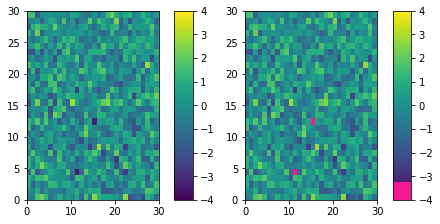

<Figure size 432x288 with 0 Axes>

In [13]:
%matplotlib inline

viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0, 1, 256))
pink = np.array([248/256, 
                 24/256, 
                 148/256, 
                 1]
               )

newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)

def plot_examples(cms):
    """
    helper function to plot two colormaps
    """
    np.random.seed(19690801)
    data = np.random.randn(30, 30)
    
    fig, axs = plt.subplots(1, 2, 
                            figsize=(6, 3), 
                            constrained_layout = True)
    
    for [ax, cmap] in zip(axs, cms):
        psm = ax.pcolormesh(data, 
                            cmap=cmap, 
                            rasterized=True, 
                            vmin=-4, 
                            vmax=4)
        
        fig.colorbar(psm, ax=ax)
    
    plt.show()
    
# plot_examples([viridis, newcmp])    
plot_examples([viridis, newcmp])
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Matplotlib\images\viridis.jpg")

we can easily reduce the dynamic range of a colormap; here we choose the middle 0.5 of
the colormap.However, we need to interpolate from a larger colormap, otherwise the new
colormap will have repeated values.

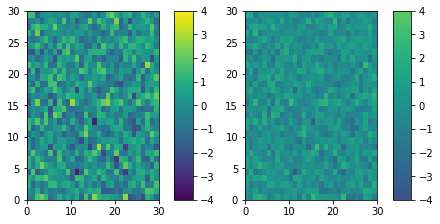

<Figure size 432x288 with 0 Axes>

In [14]:
%matplotlib inline
viridisBig = cm.get_cmap('viridis', 512)
newcmp = ListedColormap(viridisBig(np.linspace(0.25, 0.75, 256)))
plot_examples([viridis, newcmp])
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Matplotlib\images\viridis1.jpg")

and we can easily concatenate two colormaps:

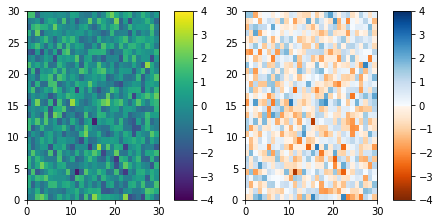

<Figure size 432x288 with 0 Axes>

In [15]:
top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)

newcolors = np.vstack((top(np.linspace(0, 1, 128)), 
                       bottom(np.linspace(0, 1, 128))
                      ))

newcmp = ListedColormap(newcolors, 
                        name = 'OrangeBlue')

plot_examples([viridis, newcmp])

plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Matplotlib\images\viridis2.jpg")

In [16]:
Of course we need not start from a named colormap, we just need to create the Nx4 array
to pass to ListedColormap.Here we create a brown colormap that goes to white.....

SyntaxError: invalid syntax (<ipython-input-16-1827a47f04ca>, line 1)

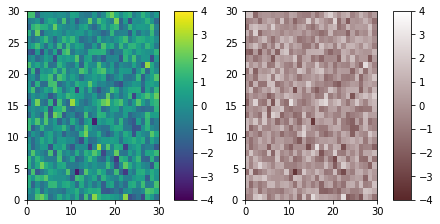

<Figure size 432x288 with 0 Axes>

In [17]:
N = 256
vals = np.ones((N, 4))
vals[:, 0] = np.linspace(90/256, 1, N)
vals[:, 1] = np.linspace(39/256, 1, N)
vals[:, 2] = np.linspace(41/256, 1, N)

newcmp = ListedColormap(vals)
plot_examples([viridis, newcmp])
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Matplotlib\images\viridis3.jpg")

## Creating linear segmented colormaps
The format to specify these colormaps allows discontinuities at the anchor points. Each
 anchor point is specified as a row in a matrix of the form [x[i] yleft[i] yright[i]], 
where x[i] is the anchor, and yleft[i] and yright[i] are the values of the color on 
either side of the anchor point.

if there are no discontinuities, then yleft[i]=yright[i]:

In [21]:
cdict = {'red':[
    [0.0, 0.0, 0.0], 
    [0.5, 1.0, 1.0], 
    [1.0, 1.0, 1.0]],
         
         'green':[
             [0.0, 0.0,  0.0], 
             [0.25, 0.0, 0.0], 
             [0.75, 1.0, 1.0]], 
         
         'blue':[
             [0.0, 0.0, 0.0], 
             [0.5, 0.0, 0.0], 
             [1.0, 1.0, 1.0]]
        }

def plot_linearmap(cdict):
    newcmp = LinearSegmentedColormap('testCmap', 
                                     segmentdata = cdict, 
                                     N = 256)
    
    rgba = newcmp(np.linspace(0, 1, 256))
    fig, ax = plt.subplots(figsize=(4, 3), 
                           constrained_layout = True)
    
    col = ['r', 'g', 'b']
    for xx in [0.25, 0.5, 0.75]:
        ax.axvline(xx, 
                   color='0.7', 
                   linestyle='--')
 
for i in range(3):
        ax.plot(np.arange(256)/256, 
                rgba[:, i], 
                color = col[i]
               )
        
        ax.set_xlabel('index')
        ax.set_ylabel('RGB')
        
plt.show()
    
plot_linearmap(cdict)
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Objects\Matplotlib\images\viridis4.jpg")

NameError: name 'ax' is not defined